In [1]:
import requests
import pandas as pd

# Define your API key
US_CENSUS_API_KEY = 'd536de1caab79b8c378cd2a6c728144703242080'

# Base URL and common components for ACS 1-Year data
host = 'https://api.census.gov/data'
g = '?get='


# Define location filter for NY-12 congressional district
location_filter = '&for=congressional%20district:12&in=state:36'  # NY-12 district in New York

# Define variables for each table
variables_dp05 = 'NAME,DP05_0001E,DP05_0018E,DP05_0019E,DP05_0021E,DP05_0024E,DP05_0037E,DP05_0038E,DP05_0047E,DP05_0076E,DP05_0002E,DP05_0003E'
variables_dp03 = 'NAME,DP03_0004E,DP03_0005E,DP03_0062E,DP03_0088E'
#variables_s0101 = 'NAME,S0101_C01_001E,S0101_C01_002E,S0101_C01_026E,S0101_C01_030E'
variables_s1501 = 'NAME,S1501_C02_003E,S1501_C02_004E,S1501_C02_005E,S1501_C02_014E,S1501_C02_015E'
variables_dp04 = 'NAME,DP04_0089E,DP04_0134E'

# Initialize a list to store dataframes for each year
dfs = []

In [3]:




# Loop through each year and fetch data
for year in [2017,2018,2019,2021, 2022, 2023]:
    # Construct query URLs for each table
    query_url_dp05 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp05}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp03 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp03}{location_filter}&key={US_CENSUS_API_KEY}"
   # query_url_s0101 = f"{host}/{year}/acs/acs1/subject{g}{variables_s0101}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_s1501 = f"{host}/{year}/acs/acs1/subject{g}{variables_s1501}{location_filter}&key={US_CENSUS_API_KEY}"
    query_url_dp04 = f"{host}/{year}/acs/acs1/profile{g}{variables_dp04}{location_filter}&key={US_CENSUS_API_KEY}"

    # Fetch data for each table
    response_dp05 = requests.get(query_url_dp05)
    response_dp03 = requests.get(query_url_dp03)
    #response_s0101 = requests.get(query_url_s0101)
    response_s1501 = requests.get(query_url_s1501)
    response_dp04 = requests.get(query_url_dp04)

    # Check if all requests were successful
    if (response_dp05.status_code == 200 and response_dp03.status_code == 200
         and response_s1501.status_code == 200
        and response_dp04.status_code == 200):

        # DP05 Data
        data_dp05 = response_dp05.json()
        columns_dp05 = data_dp05[0]  # First row is header
        data_dp05 = data_dp05[1:]    # Remaining rows are data
        df_dp05 = pd.DataFrame(data_dp05, columns=columns_dp05)

        # Rename DP05 columns for clarity
        df_dp05 = df_dp05.rename(columns={
            'NAME': 'District_Name',
            'DP05_0001E': 'Total_Population',
            'DP05_0018E': 'Median_Age',
            'DP05_0019E': 'Population_Under_18',
            'DP05_0021E': 'Population_18_and_Over',
            'DP05_0024E': 'Population_65_and_Over',
            'DP05_0037E': 'White_Alone',
            'DP05_0038E': 'Black_or_African_American_Alone',
            'DP05_0047E': 'Asian_Alone',
            'DP05_0076E': 'Hispanic_or_Latino',
            'DP05_0002E': 'Male_Population',
            'DP05_0003E': 'Female_Population'
        })

        # DP03 Data
        data_dp03 = response_dp03.json()
        columns_dp03 = data_dp03[0]  # First row is header
        data_dp03 = data_dp03[1:]    # Remaining rows are data
        df_dp03 = pd.DataFrame(data_dp03, columns=columns_dp03)

        # Rename DP03 columns for clarity
        df_dp03 = df_dp03.rename(columns={
            'NAME': 'District_Name',
            'DP03_0004E': 'Employed_Civilian_Labor_Force',
            'DP03_0005E': 'Unemployed_Civilian_Labor_Force',
            'DP03_0062E': 'Median_Household_Income',
            'DP03_0088E': 'Per_Capita_Income'
        })

        # S0101 Data
       # data_s0101 = response_s0101.json()
        #columns_s0101 = data_s0101[0]  # First row is header
        #data_s0101 = data_s0101[1:]    # Remaining rows are data
        #df_s0101 = pd.DataFrame(data_s0101, columns=columns_s0101)

        # Rename S0101 columns for clarity
        #df_s0101 = df_s0101.rename(columns={
        #   'NAME': 'District_Name',
         #   'S0101_C01_001E': 'Total_Population_AgeSex',
        #    'S0101_C01_002E': 'Population_Under_5',
        #    'S0101_C01_026E': 'Population_65_and_Over_AgeSex',
        #    'S0101_C01_030E': 'Median_Age_AgeSex'
        #})

        # S1501 Data
        data_s1501 = response_s1501.json()
        columns_s1501 = data_s1501[0]  # First row is header
        data_s1501 = data_s1501[1:]    # Remaining rows are data
        df_s1501 = pd.DataFrame(data_s1501, columns=columns_s1501)

        # Rename S1501 columns for clarity
        df_s1501 = df_s1501.rename(columns={
            'NAME': 'District_Name',
            'S1501_C02_003E': 'High_School_Grad_18_to_24',
            'S1501_C02_004E': 'College_Degree_18_to_24',
            'S1501_C02_005E': 'High_School_Grad_or_Higher_18_to_24',
            'S1501_C02_014E': 'High_School_Grad_or_Higher_Over_25',
            'S1501_C02_015E': 'Bachelor_Degree_or_Higher_Over_25'
        })

        # DP04 Data
        data_dp04 = response_dp04.json()
        columns_dp04 = data_dp04[0]  # First row is header
        data_dp04 = data_dp04[1:]    # Remaining rows are data
        df_dp04 = pd.DataFrame(data_dp04, columns=columns_dp04)

        # Rename DP04 columns for clarity
        df_dp04 = df_dp04.rename(columns={
            'NAME': 'District_Name',
            'DP04_0089E': 'Median_Home_Value',
            'DP04_0134E': 'Median_Gross_Rent',
        })

        # Merge all data for the year
        df_year = pd.merge(df_dp05, df_dp03, on=['District_Name', 'state', 'congressional district'], how='outer')
       # df_year = pd.merge(df_year, df_s0101, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year = pd.merge(df_year, df_s1501, on=['District_Name', 'state', 'congressional district'], how='outer')
        df_year = pd.merge(df_year, df_dp04, on=['District_Name', 'state', 'congressional district'], how='outer')

        # Add a column for the year
        df_year['Year'] = year

        # Append to the list
        dfs.append(df_year)
    else:
        print(f"Data for {year} is unavailable or incomplete.")

# Concatenate all years into a single DataFrame
df_combined_all_years = pd.concat(dfs, ignore_index=True)

#display(df_combined_all_years.head())


In [4]:
display(df_combined_all_years)


,District_Name,Total_Population,Median_Age,Population_Under_18,Population_18_and_Over,Population_65_and_Over,White_Alone,Black_or_African_American_Alone,Asian_Alone,Hispanic_or_Latino,...,Median_Household_Income,Per_Capita_Income,High_School_Grad_18_to_24,College_Degree_18_to_24,High_School_Grad_or_Higher_18_to_24,High_School_Grad_or_Higher_Over_25,Bachelor_Degree_or_Higher_Over_25,Median_Home_Value,Median_Gross_Rent,Year
0,"Congressional District 12 (115th Congress), Ne...",714279,35.7,84380,629899,107188,518707,36774,8466,609131,...,107010,89677,13.7,32.2,47.7,94.5,74.1,1004600,2156,2017
1,"Congressional District 12 (116th Congress), Ne...",698928,35.8,78781,620147,110208,506188,36314,6212,612405,...,110569,93924,16.9,39.8,40.2,95.3,74.0,1083700,2185,2018
2,"Congressional District 12 (116th Congress), Ne...",725760,36.2,86746,639014,119460,515038,38876,6549,621541,...,124502,98414,21.5,35.3,39.6,93.6,72.5,1141500,2269,2019
3,"Congressional District 12 (116th Congress), Ne...",711858,36.6,87790,624068,114429,449891,37174,6610,612700,...,112796,93168,24.4,31.3,41.4,95.5,74.7,946600,2344,2021
4,"Congressional District 12 (118th Congress), Ne...",705008,40.3,85576,619432,140266,466112,35217,6427,4846,...,142104,128081,17.2,29.8,48.5,96.6,82.3,1150200,2709,2022
5,"Congressional District 12 (118th Congress), Ne...",734996,40.0,93232,641764,154545,480344,38014,97145,91563,...,149367,128681,11.9,27.3,57.0,97.3,81.1,1129700,3121,2023


In [5]:
print(df_combined_all_years.dtypes)


District_Name                          object
Total_Population                       object
Median_Age                             object
Population_Under_18                    object
Population_18_and_Over                 object
Population_65_and_Over                 object
White_Alone                            object
Black_or_African_American_Alone        object
Asian_Alone                            object
Hispanic_or_Latino                     object
Male_Population                        object
Female_Population                      object
state                                  object
congressional district                 object
Employed_Civilian_Labor_Force          object
Unemployed_Civilian_Labor_Force        object
Median_Household_Income                object
Per_Capita_Income                      object
High_School_Grad_18_to_24              object
College_Degree_18_to_24                object
High_School_Grad_or_Higher_18_to_24    object
High_School_Grad_or_Higher_Over_25

In [6]:
# Exclude 'Year' column from conversion
for col in df_combined_all_years.columns:
    if col != 'Year':
        df_combined_all_years[col] = pd.to_numeric(df_combined_all_years[col], errors='coerce')

# Verify the types again
print(df_combined_all_years.dtypes)


District_Name                          float64
Total_Population                         int64
Median_Age                             float64
Population_Under_18                      int64
Population_18_and_Over                   int64
Population_65_and_Over                   int64
White_Alone                              int64
Black_or_African_American_Alone          int64
Asian_Alone                              int64
Hispanic_or_Latino                       int64
Male_Population                          int64
Female_Population                        int64
state                                    int64
congressional district                   int64
Employed_Civilian_Labor_Force            int64
Unemployed_Civilian_Labor_Force          int64
Median_Household_Income                  int64
Per_Capita_Income                        int64
High_School_Grad_18_to_24              float64
College_Degree_18_to_24                float64
High_School_Grad_or_Higher_18_to_24    float64
High_School_G

In [7]:
print(df_combined_all_years.describe())


       District_Name  Total_Population  Median_Age  Population_Under_18  \
count            0.0          6.000000    6.000000             6.000000   
mean             NaN     715138.166667   37.433333         86084.166667   
std              NaN      13296.949491    2.130415          4710.373081   
min              NaN     698928.000000   35.700000         78781.000000   
25%              NaN     706720.500000   35.900000         84679.000000   
50%              NaN     713068.500000   36.400000         86161.000000   
75%              NaN     722889.750000   39.150000         87529.000000   
max              NaN     734996.000000   40.300000         93232.000000   

       Population_18_and_Over  Population_65_and_Over  White_Alone  \
count                6.000000                6.000000       6.0000   
mean            629054.000000           124349.333333  489380.0000   
std               9573.269598            18878.166369   28225.3255   
min             619432.000000           1071

In [8]:
print(df_combined_all_years.isnull().sum())


District_Name                          6
Total_Population                       0
Median_Age                             0
Population_Under_18                    0
Population_18_and_Over                 0
Population_65_and_Over                 0
White_Alone                            0
Black_or_African_American_Alone        0
Asian_Alone                            0
Hispanic_or_Latino                     0
Male_Population                        0
Female_Population                      0
state                                  0
congressional district                 0
Employed_Civilian_Labor_Force          0
Unemployed_Civilian_Labor_Force        0
Median_Household_Income                0
Per_Capita_Income                      0
High_School_Grad_18_to_24              0
College_Degree_18_to_24                0
High_School_Grad_or_Higher_18_to_24    0
High_School_Grad_or_Higher_Over_25     0
Bachelor_Degree_or_Higher_Over_25      0
Median_Home_Value                      0
Median_Gross_Ren

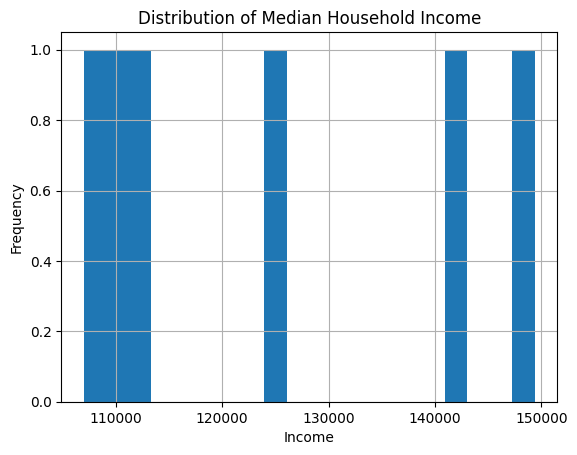

In [9]:
import matplotlib.pyplot as plt
df_combined_all_years['Median_Household_Income'].hist(bins=20)
plt.title("Distribution of Median Household Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


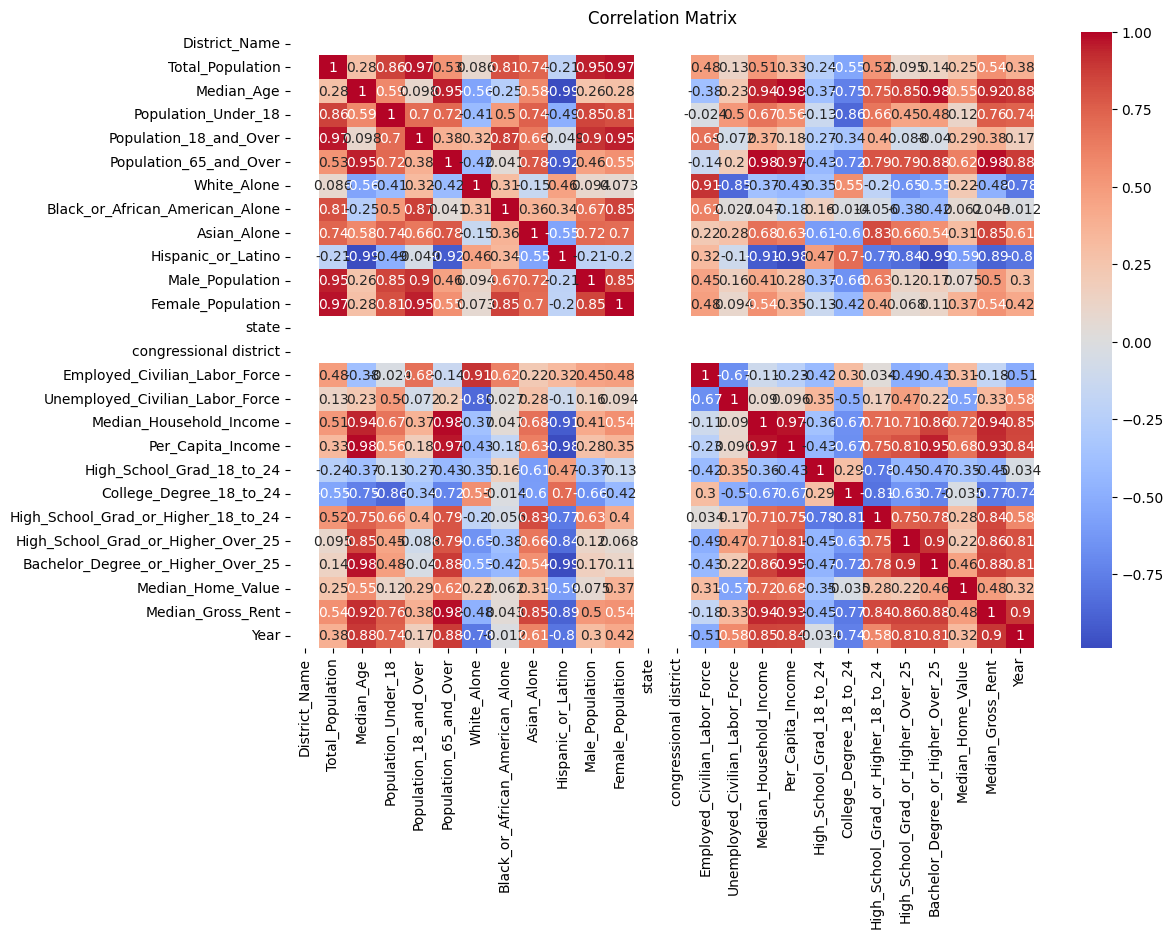

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df_combined_all_years.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


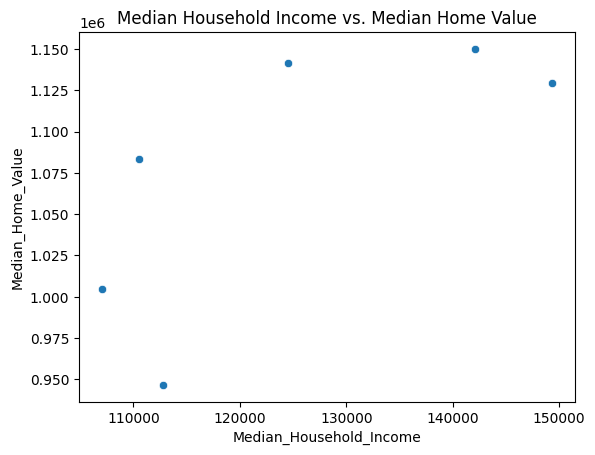

In [11]:
sns.scatterplot(data=df_combined_all_years, x='Median_Household_Income', y='Median_Home_Value')
plt.title("Median Household Income vs. Median Home Value")
plt.show()


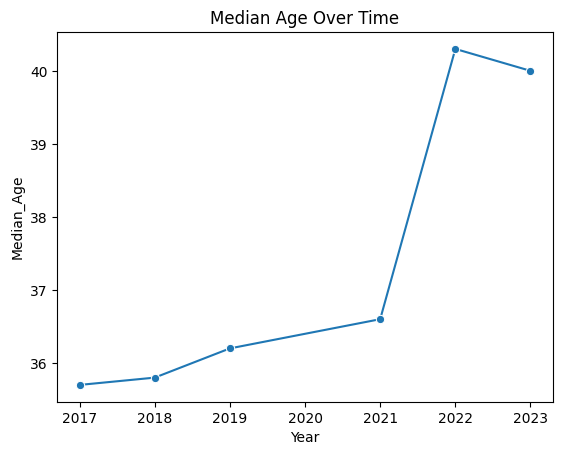

In [12]:
sns.lineplot(data=df_combined_all_years, x='Year', y='Median_Age', marker="o")
plt.title("Median Age Over Time")
plt.show()


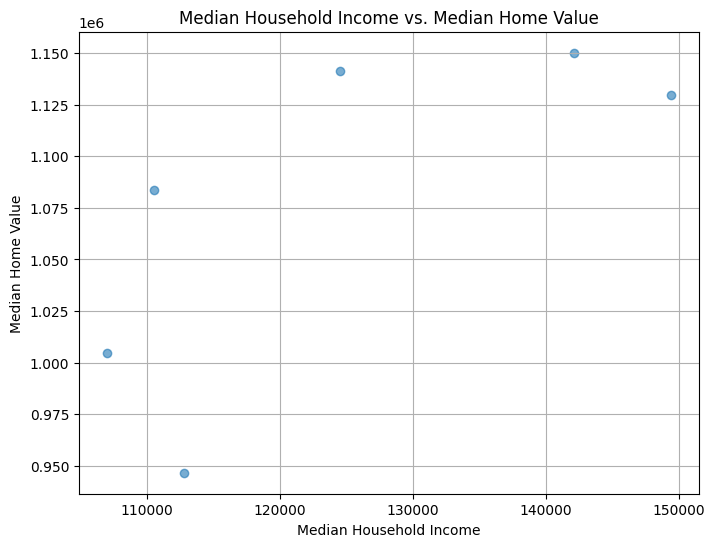

In [13]:
# Median Household Income vs. Median Home Value
plt.figure(figsize=(8, 6))
plt.scatter(df_combined_all_years['Median_Household_Income'], df_combined_all_years['Median_Home_Value'], alpha=0.6)
plt.xlabel('Median Household Income')
plt.ylabel('Median Home Value')
plt.title('Median Household Income vs. Median Home Value')
plt.grid(True)
plt.show()


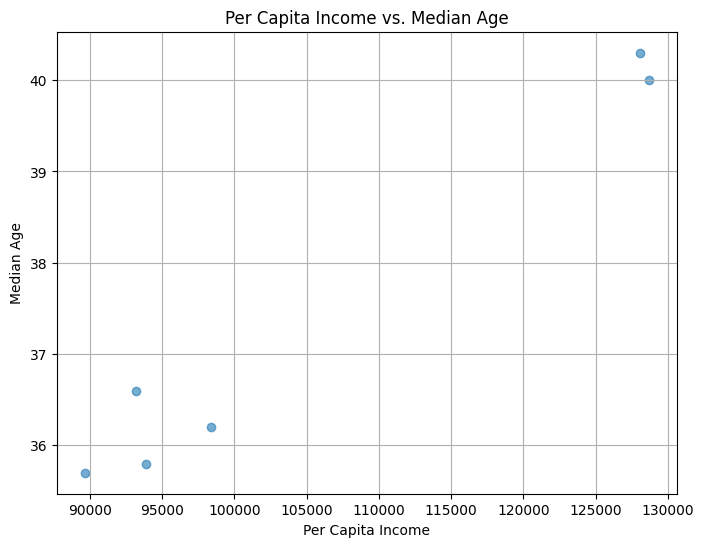

In [14]:
# Per Capita Income vs. Median Age
plt.figure(figsize=(8, 6))
plt.scatter(df_combined_all_years['Per_Capita_Income'], df_combined_all_years['Median_Age'], alpha=0.6)
plt.xlabel('Per Capita Income')
plt.ylabel('Median Age')
plt.title('Per Capita Income vs. Median Age')
plt.grid(True)
plt.show()


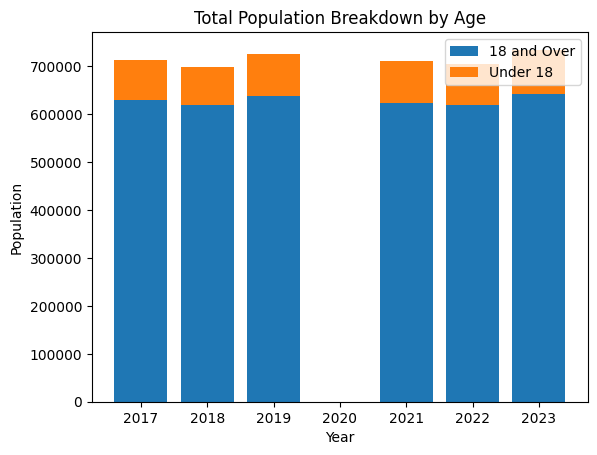

In [15]:
import matplotlib.pyplot as plt

if 'Under_18_Population' not in df_combined_all_years.columns:
    df_combined_all_years['Under_18_Population'] = (
        df_combined_all_years['Total_Population'] - df_combined_all_years['Population_18_and_Over']
    )

# Plotting the stacked bar chart
fig, ax = plt.subplots()
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Population_18_and_Over'], label='18 and Over')
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Under_18_Population'],
       bottom=df_combined_all_years['Population_18_and_Over'], label='Under 18')

ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Total Population Breakdown by Age")
ax.legend()

plt.show()


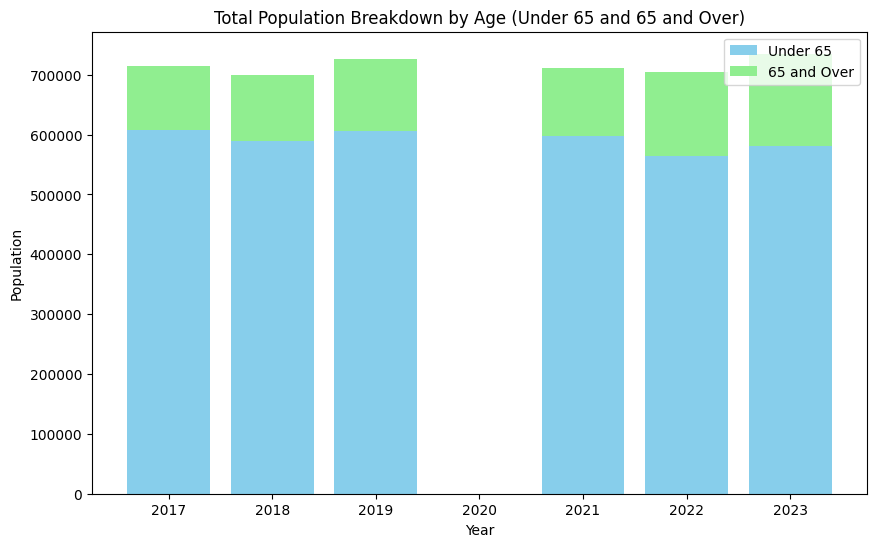

In [16]:
import matplotlib.pyplot as plt

# Calculating the "Under 65" population as the difference between Total Population and Population 65 and Over
df_combined_all_years['Population_Under_65'] = df_combined_all_years['Total_Population'] - df_combined_all_years['Population_65_and_Over']

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for "Under 65" and "65 and Over"
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Population_Under_65'], label='Under 65', color='skyblue')
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Population_65_and_Over'],
       bottom=df_combined_all_years['Population_Under_65'], label='65 and Over', color='lightgreen')

# Adding labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_title("Total Population Breakdown by Age (Under 65 and 65 and Over)")
ax.legend()

plt.show()


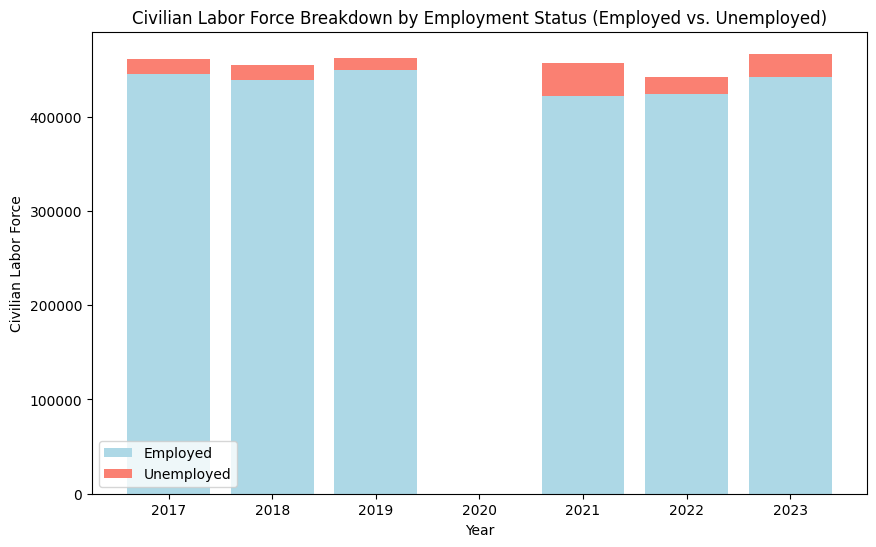

In [17]:
import matplotlib.pyplot as plt

# Calculating the "Total Labor Force" by summing Employed and Unemployed Civilian Labor Force
df_combined_all_years['Total_Labor_Force'] = (
    df_combined_all_years['Employed_Civilian_Labor_Force'] + df_combined_all_years['Unemployed_Civilian_Labor_Force']
)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bars for "Employed" and "Unemployed"
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Employed_Civilian_Labor_Force'], label='Employed', color='lightblue')
ax.bar(df_combined_all_years['Year'], df_combined_all_years['Unemployed_Civilian_Labor_Force'],
       bottom=df_combined_all_years['Employed_Civilian_Labor_Force'], label='Unemployed', color='salmon')

# Adding labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Civilian Labor Force")
ax.set_title("Civilian Labor Force Breakdown by Employment Status (Employed vs. Unemployed)")
ax.legend()

plt.show()


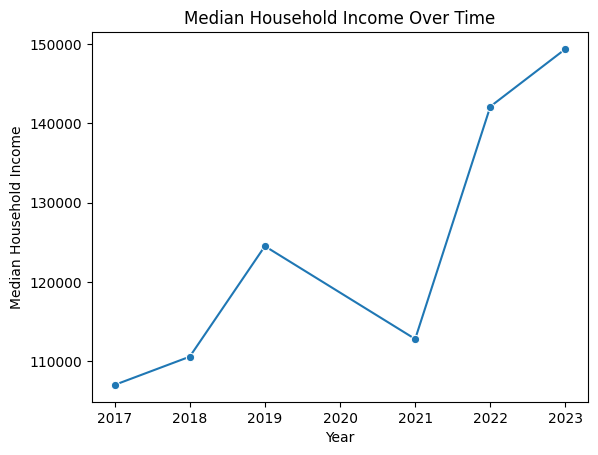

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_combined_all_years, x='Year', y='Median_Household_Income', marker='o')
plt.title("Median Household Income Over Time")
plt.xlabel("Year")
plt.ylabel("Median Household Income")
plt.show()



In [19]:
# Remove spaces in column names or replace them with underscores
df_combined_all_years.columns = df_combined_all_years.columns.str.replace(' ', '_')

# Verify the new column names
print(df_combined_all_years.columns)


Index(['District_Name', 'Total_Population', 'Median_Age',
       'Population_Under_18', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'state',
       'congressional_district', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'High_School_Grad_or_Higher_Over_25',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent', 'Year', 'Under_18_Population',
       'Population_Under_65', 'Total_Labor_Force'],
      dtype='object')


In [20]:
# Remove brackets and replace spaces with underscores in column names
df_combined_all_years.columns = df_combined_all_years.columns.str.replace(r'[\(\)\s]', '_', regex=True)
print(df_combined_all_years.columns)


Index(['District_Name', 'Total_Population', 'Median_Age',
       'Population_Under_18', 'Population_18_and_Over',
       'Population_65_and_Over', 'White_Alone',
       'Black_or_African_American_Alone', 'Asian_Alone', 'Hispanic_or_Latino',
       'Male_Population', 'Female_Population', 'state',
       'congressional_district', 'Employed_Civilian_Labor_Force',
       'Unemployed_Civilian_Labor_Force', 'Median_Household_Income',
       'Per_Capita_Income', 'High_School_Grad_18_to_24',
       'College_Degree_18_to_24', 'High_School_Grad_or_Higher_18_to_24',
       'High_School_Grad_or_Higher_Over_25',
       'Bachelor_Degree_or_Higher_Over_25', 'Median_Home_Value',
       'Median_Gross_Rent', 'Year', 'Under_18_Population',
       'Population_Under_65', 'Total_Labor_Force'],
      dtype='object')


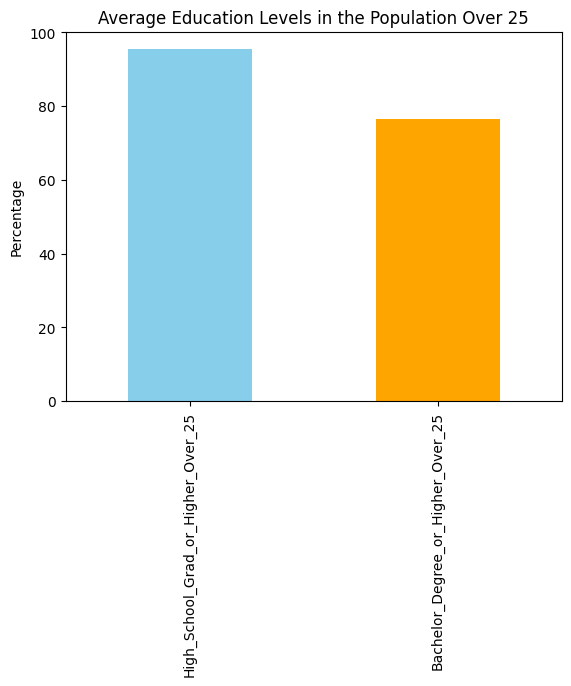

In [21]:
import matplotlib.pyplot as plt


education_levels = ['High_School_Grad_or_Higher_Over_25', 'Bachelor_Degree_or_Higher_Over_25']

# Calculating the mean of  education columns over the years
education_data = df_combined_all_years[education_levels].mean()

# Plotting the education levels
education_data.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Average Education Levels in the Population Over 25")
plt.ylabel("Percentage")
plt.show()


In [22]:
# Select only the relevant columns: 'Year', 'High_School_Grad_or_Higher_Over_25_', 'Bachelor_Degree_or_Higher_Over_25_'
education_info = df_combined_all_years[['Year', 'High_School_Grad_or_Higher_Over_25', 'Bachelor_Degree_or_Higher_Over_25']]

# Print the DataFrame to view the selected columns
print(education_info)


   Year  High_School_Grad_or_Higher_Over_25  Bachelor_Degree_or_Higher_Over_25
0  2017                                94.5                               74.1
1  2018                                95.3                               74.0
2  2019                                93.6                               72.5
3  2021                                95.5                               74.7
4  2022                                96.6                               82.3
5  2023                                97.3                               81.1


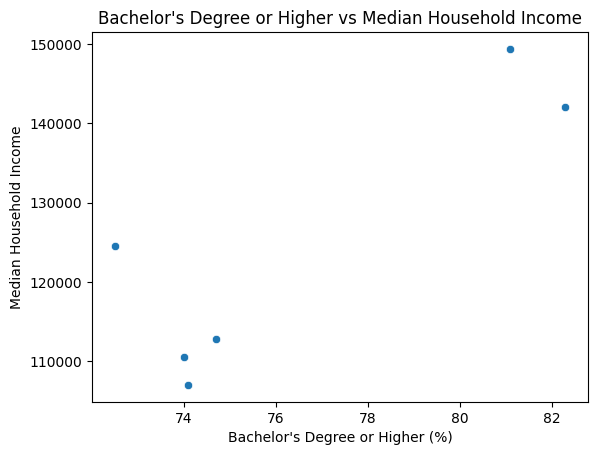

In [23]:
sns.scatterplot(data=df_combined_all_years, x='Bachelor_Degree_or_Higher_Over_25', y='Median_Household_Income')
plt.title("Bachelor's Degree or Higher vs Median Household Income")
plt.xlabel("Bachelor's Degree or Higher (%)")
plt.ylabel("Median Household Income")
plt.show()


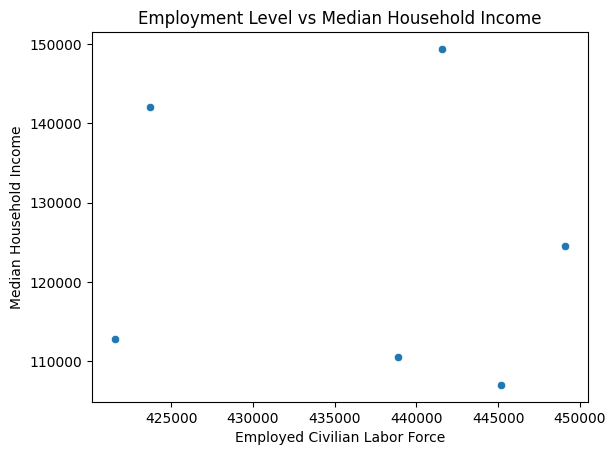

In [24]:
sns.scatterplot(data=df_combined_all_years, x='Employed_Civilian_Labor_Force', y='Median_Household_Income')
plt.title("Employment Level vs Median Household Income")
plt.xlabel("Employed Civilian Labor Force")
plt.ylabel("Median Household Income")
plt.show()


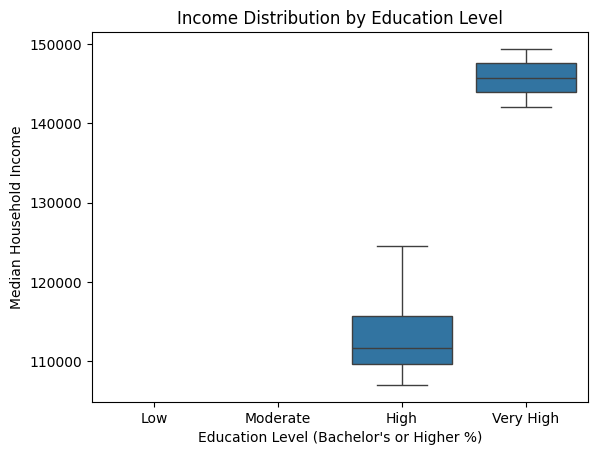

In [25]:
df_combined_all_years['Education_Level'] = pd.cut(df_combined_all_years['Bachelor_Degree_or_Higher_Over_25'],
                                                  bins=[0, 25, 50, 75, 100],
                                                  labels=['Low', 'Moderate', 'High', 'Very High'])

sns.boxplot(data=df_combined_all_years, x='Education_Level', y='Median_Household_Income')
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level (Bachelor's or Higher %)")
plt.ylabel("Median Household Income")
plt.show()


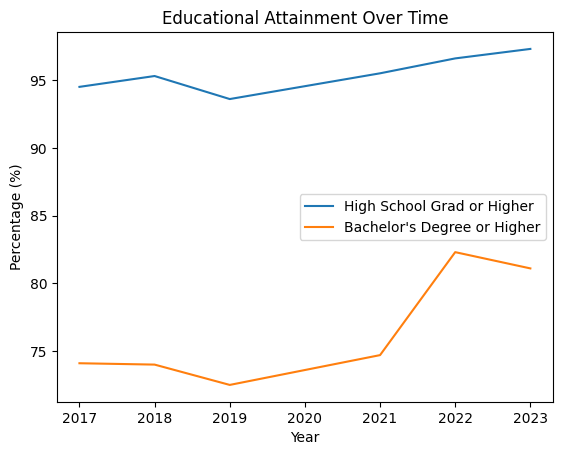

In [26]:
sns.lineplot(data=df_combined_all_years, x='Year', y='High_School_Grad_or_Higher_Over_25', label="High School Grad or Higher")
sns.lineplot(data=df_combined_all_years, x='Year', y='Bachelor_Degree_or_Higher_Over_25', label="Bachelor's Degree or Higher")
plt.title("Educational Attainment Over Time")
plt.ylabel("Percentage (%)")
plt.show()


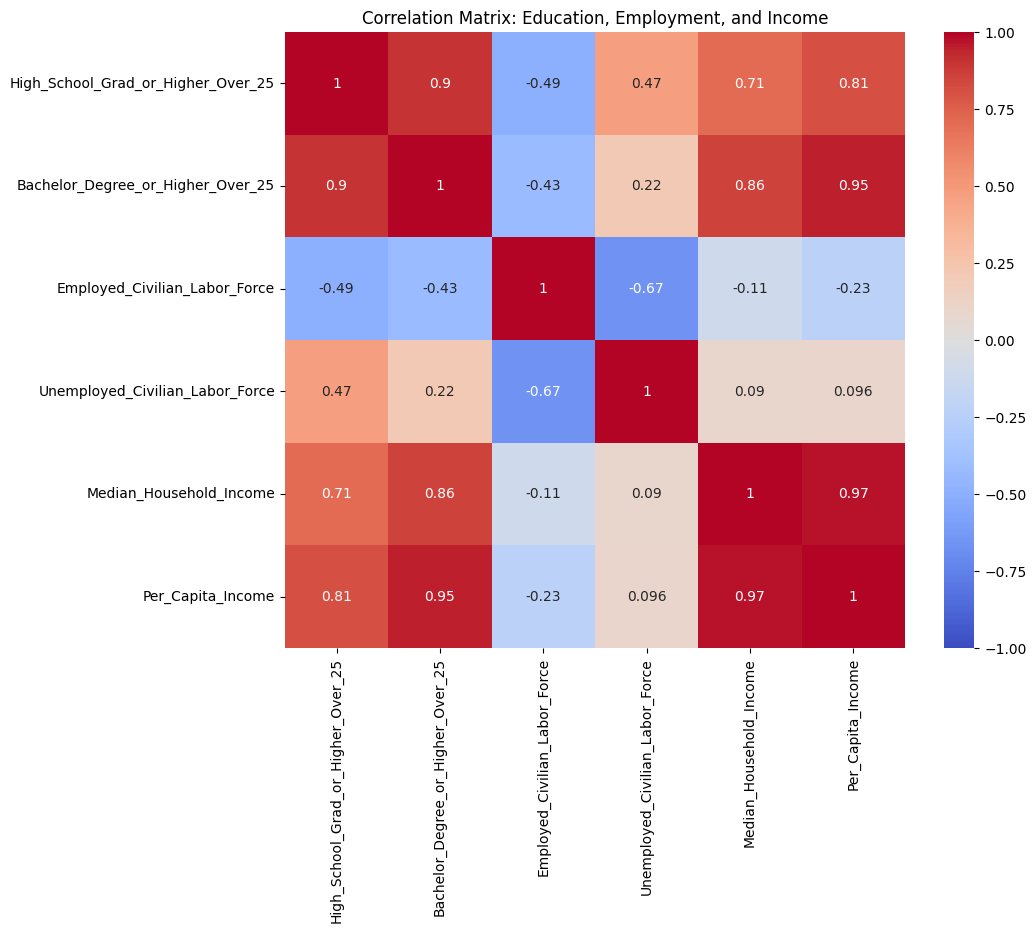

In [27]:
# Selecting relevant columns for correlation analysis
relevant_columns = [
    'High_School_Grad_or_Higher_Over_25',
    'Bachelor_Degree_or_Higher_Over_25',
    'Employed_Civilian_Labor_Force',
    'Unemployed_Civilian_Labor_Force',
    'Median_Household_Income',
    'Per_Capita_Income'
]
correlation_matrix = df_combined_all_years[relevant_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix: Education, Employment, and Income")
plt.show()


Election Results Dataset


In [31]:
import pandas as pd

# Upload the file
from google.colab import files
uploaded = files.upload()



Saving elstats_search_23575a519141a70c_copy.csv to elstats_search_23575a519141a70c_copy.csv


In [32]:
# Load the dataset
df_election_history = pd.read_csv('elstats_search_23575a519141a70c_copy.csv')
df_election_history.head()


,contest_id,election_id,election_date,election_type,primary_party,question_text,question_type,office_id,office_name,office_modifier,...,retention_candidate_id,retention_candidate_name,division_id,division_type,division_name,vote_channel,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68,County,New York,NaN,False,19.0,Parent,40994


In [33]:
# Remove the specified columns
columns_to_remove = [
    'question_text', 'question_type', 'office_id', 'office_name',
    'office_modifier', 'retention_candidate_id', 'retention_candidate_name', 'vote_channel'
]
df_election_history.drop(columns=columns_to_remove, inplace=True)

# Display the first few rows to verify
df_election_history.head()


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,NaN,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994


In [34]:
# Define values to ignore
ignore_names = ["scattering", "blank", "void"]

# Creating a dictionary to store the first occurrence of candidate party by candidate name
party_dict = {}

# Populating the dictionary with the first observed non-NaN party value for each candidate
for idx, row in df_election_history.iterrows():
    candidate = row['candidate_name']
    candidate_party = row['candidate_party_name']

    # Only storing the candidate party if it's not NaN and the candidate name isn't in the ignore list
    if pd.notna(candidate_party) and candidate.lower() not in ignore_names:
        if candidate not in party_dict:
            party_dict[candidate] = candidate_party

# Using the dictionary to replace NaN values in 'primary_party' for all occurrences of each candidate
df_election_history['primary_party'] = df_election_history.apply(
    lambda x: party_dict.get(x['candidate_name']) if (pd.isna(x['primary_party']) or x['primary_party'] != party_dict.get(x['candidate_name'])) and x['candidate_name'].lower() not in ignore_names else x['primary_party'],
    axis=1
)

# Displaying the first few rows to verify
display(df_election_history)


,contest_id,election_id,election_date,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes
0,16,1,2022-11-08T00:00:00Z,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872
1,16,1,2022-11-08T00:00:00Z,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018
2,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994
3,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715
4,16,1,2022-11-08T00:00:00Z,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,12570,Miguel I. Prado,430,County,Queens,False,9.0,Conservative,359
297,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,12570,Miguel I. Prado,430,County,Queens,False,96.0,Right to Life,2629
298,5205,84,1996-11-05T00:00:00Z,General,Socialist Workers,188,Congressional District,12,12571,Eleanor Garcia,430,County,Queens,False,147.0,Socialist Workers,240
299,5205,84,1996-11-05T00:00:00Z,General,Republican,188,Congressional District,12,5725,Blank/Void/Scattering,430,County,Queens,False,8.0,Republican,5785


In [35]:
# Output the modified DataFrame to a CSV file
df_election_history.to_csv('cleaned_election_history.csv', index=False)

print("Data has been saved to 'cleaned_election_history.csv'")


Data has been saved to 'cleaned_election_history.csv'


In [36]:
# Converting the 'election_date' column to datetime format if it isn't already
df_election_history['election_date'] = pd.to_datetime(df_election_history['election_date'], errors='coerce')

# Extracting the year and create a new column 'election_year'
df_election_history['election_year'] = df_election_history['election_date'].dt.year

# Dropping the original 'election_date' column
df_election_history.drop(columns=['election_date'], inplace=True)

# Displaying the first few rows to verify
df_election_history.head()


,contest_id,election_id,election_type,primary_party,district_id,district_type,district_name,candidate_id,candidate_name,division_id,division_type,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,16,1,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,7.0,Democratic,184872,2022
1,16,1,General,Democratic,188,Congressional District,12,43,Jerrold L. Nadler,68,County,New York,True,10.0,Working Families,16018,2022
2,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,8.0,Republican,40994,2022
3,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,9.0,Conservative,2715,2022
4,16,1,General,Republican,188,Congressional District,12,44,Michael K. Zumbluskas,68,County,New York,False,19.0,Parent,40994,2022


In [ ]:
#files.download('cleaned_election_history.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# List of columns to drop
columns_to_drop = ['contest_id', 'election_type', 'district_type', 'division_type']

# Drop the specified columns if they exist in the DataFrame
df_election_history = df_election_history.drop(columns=[col for col in columns_to_drop if col in df_election_history.columns])

# Display the first few rows of the updated DataFrame to verify
df_election_history.head()


,election_id,primary_party,district_id,district_name,candidate_id,candidate_name,division_id,division_name,is_winner,candidate_party_id,candidate_party_name,votes,election_year
0,1,Democratic,188,12,43,Jerrold L. Nadler,68,New York,True,7.0,Democratic,184872,2022
1,1,Democratic,188,12,43,Jerrold L. Nadler,68,New York,True,10.0,Working Families,16018,2022
2,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,8.0,Republican,40994,2022
3,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,9.0,Conservative,2715,2022
4,1,Republican,188,12,44,Michael K. Zumbluskas,68,New York,False,19.0,Parent,40994,2022


In [38]:
# Basic summary statistics
print(df_election_history.describe(include='all'))

# Count unique values in categorical columns
print(df_election_history['candidate_name'].nunique())  # Example: number of unique candidates
print(df_election_history['primary_party'].value_counts())  # Example: distribution of primary parties


        election_id primary_party  district_id  district_name  candidate_id  \
count    301.000000           195        301.0          301.0    301.000000   
unique          NaN            11          NaN            NaN           NaN   
top             NaN    Republican          NaN            NaN           NaN   
freq            NaN            84          NaN            NaN           NaN   
mean      44.255814           NaN        188.0           12.0   2375.136213   
std       29.439730           NaN          0.0            0.0   3400.430738   
min        1.000000           NaN        188.0           12.0      1.000000   
25%       19.000000           NaN        188.0           12.0      9.000000   
50%       34.000000           NaN        188.0           12.0     32.000000   
75%       73.000000           NaN        188.0           12.0   4925.000000   
max       84.000000           NaN        188.0           12.0  12571.000000   

            candidate_name  division_id division_na

election_id               0
primary_party           106
district_id               0
district_name             0
candidate_id              0
candidate_name            0
division_id               0
division_name             0
is_winner                 0
candidate_party_id      121
candidate_party_name    121
votes                     0
election_year             0
dtype: int64


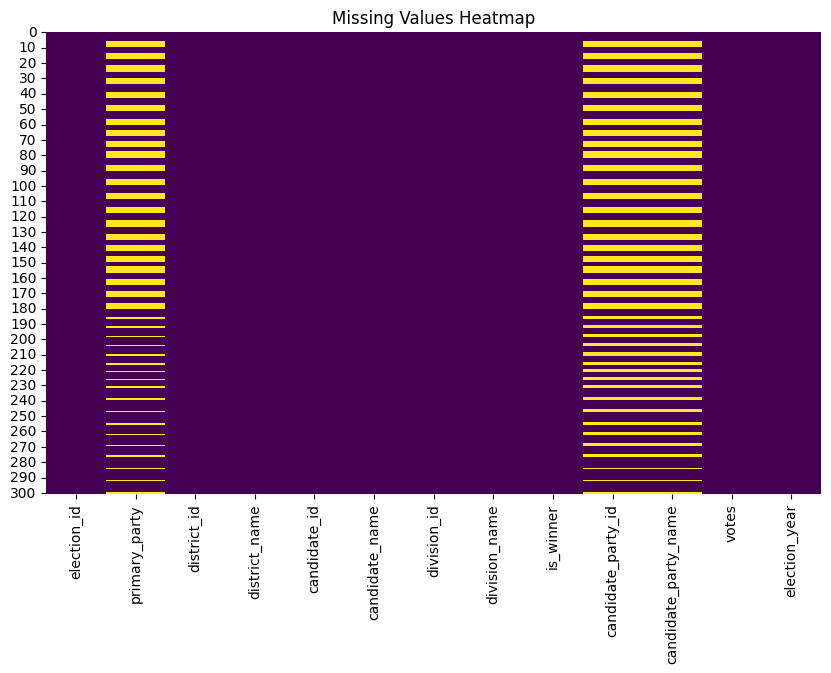

In [39]:
# Check for missing values
print(df_election_history.isnull().sum())

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_election_history.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


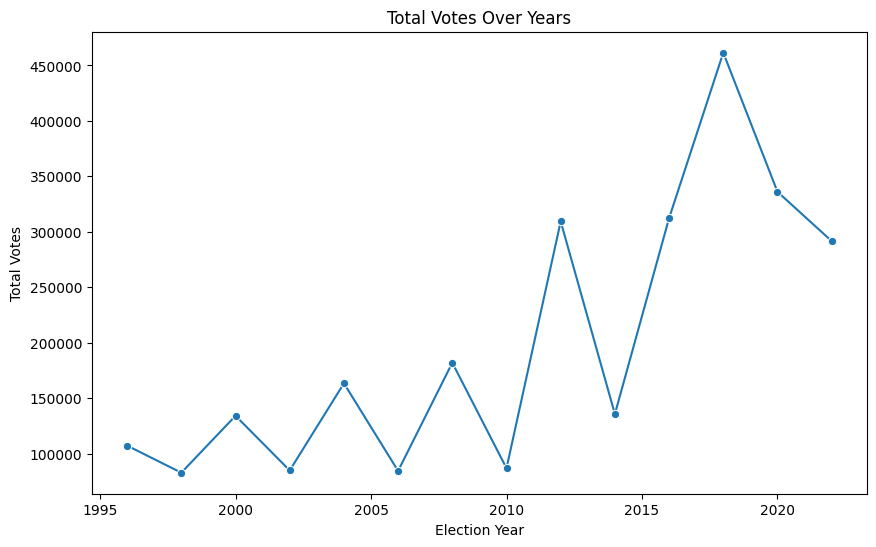

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows where candidate_name is "total_votes"
df_filtered = df_election_history[df_election_history['candidate_name'] != 'Total Votes']

# Grouping by year and calculating total votes per year
yearly_votes = df_filtered.groupby('election_year')['votes'].sum().reset_index()

# Plotting total votes over years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_votes, x='election_year', y='votes', marker="o")
plt.title("Total Votes Over Years")
plt.xlabel("Election Year")
plt.ylabel("Total Votes")
plt.show()


<ipython-input-41-bf78a8059e7a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=party_votes, x='primary_party', y='votes', palette='coolwarm')


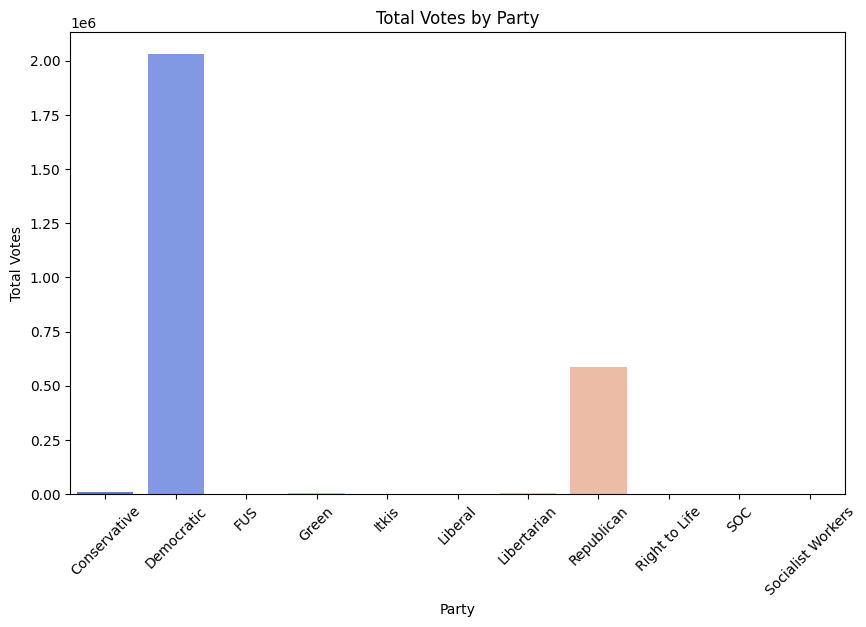

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows where candidate_name is "total_votes"
df_filtered = df_election_history[df_election_history['candidate_name'] != 'total_votes']

# Grouping by primary party and calculate total votes
party_votes = df_filtered.groupby('primary_party')['votes'].sum().reset_index()

# Plotting votes by party
plt.figure(figsize=(10, 6))
sns.barplot(data=party_votes, x='primary_party', y='votes', palette='coolwarm')
plt.title("Total Votes by Party")
plt.xlabel("Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()


In [42]:
# Check the data type of each column
print(df_election_history.dtypes)


election_id               int64
primary_party            object
district_id               int64
district_name             int64
candidate_id              int64
candidate_name           object
division_id               int64
division_name            object
is_winner                  bool
candidate_party_id      float64
candidate_party_name     object
votes                     int64
election_year             int32
dtype: object


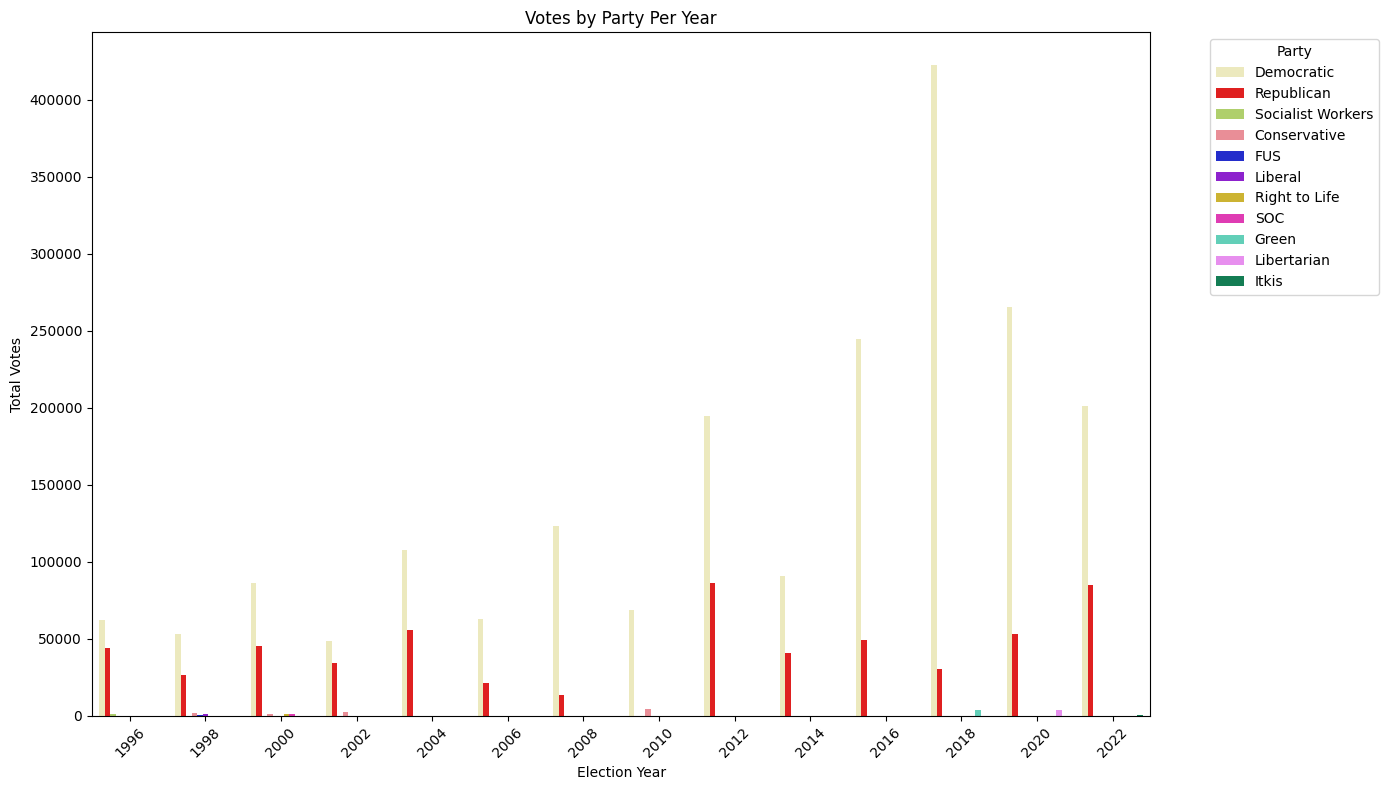

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtering out rows where candidate name is "Reform"
df_filtered = df_election_history[df_election_history['candidate_name'] != "Reform"]

# Grouping by year and primary party, then calculate the total votes for each combination
votes_by_party_year = df_filtered.groupby(['election_year', 'primary_party'])['votes'].sum().reset_index()

# Defining fixed colors for Democrat and Republican
party_colors = {
    'Democrat': 'blue',
    'Republican': 'red'
}

# Getting unique parties other than Democrat and Republican
other_parties = votes_by_party_year[~votes_by_party_year['primary_party'].isin(party_colors.keys())]['primary_party'].unique()

# Generating random colors for other parties and adding them to the color dictionary
random_colors = {party: np.random.rand(3,) for party in other_parties}
party_colors.update(random_colors)

# Plotting votes by party per year
plt.figure(figsize=(14, 8))
sns.barplot(data=votes_by_party_year, x='election_year', y='votes', hue='primary_party', palette=party_colors)
plt.title("Votes by Party Per Year")
plt.xlabel("Election Year")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [44]:
uploaded = files.upload()


Saving voter_enrollment_nov_2023.csv to voter_enrollment_nov_2023.csv


In [45]:
import pandas as pd

# Load the Excel file
file_path = 'voter_enrollment_nov_2023.csv'  # Update this to the correct file path if needed
df_voter_enrollment = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect
df_voter_enrollment.head()


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL,Unnamed: 10
0,0.0,District Total,InActive,0,0,0,0,0,0,0,NaN
1,0.0,District Total,Total,1,0,0,0,0,0,1,NaN
2,1.0,Suffolk,Active,"185,043","181,090","10,921","1,880","21,492","165,020","565,446",NaN
3,1.0,Suffolk,Inactive,"10,289","10,401",679,109,"1,403","9,712","32,593",NaN
4,1.0,Suffolk,Total,"195,332","191,491","11,600","1,989","22,895","174,732","598,039",NaN


In [46]:
# Display column data types
print(df_voter_enrollment.dtypes)


DISTRICT       float64
COUNTY          object
STATUS          object
DEM             object
REP             object
CON             object
WOR             object
OTH             object
BLANK           object
TOTAL           object
Unnamed: 10    float64
dtype: object


In [47]:
# Converting relevant columns to numeric, replacing commas and handling errors
columns_to_convert = ['DEM', 'REP', 'CON', 'WOR', 'OTH', 'BLANK', 'TOTAL']
df_voter_enrollment[columns_to_convert] = df_voter_enrollment[columns_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Verify the column types after conversion
print(df_voter_enrollment.dtypes)


DISTRICT       float64
COUNTY          object
STATUS          object
DEM            float64
REP            float64
CON            float64
WOR            float64
OTH            float64
BLANK          float64
TOTAL          float64
Unnamed: 10    float64
dtype: object


In [48]:
display(df_voter_enrollment)

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL,Unnamed: 10
0,0.0,District Total,InActive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,District Total,Total,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,1.0,Suffolk,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0,NaN
3,1.0,Suffolk,Inactive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0,NaN
4,1.0,Suffolk,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
456,26.0,District Total,Total,255194.0,112779.0,9286.0,3473.0,17749.0,114293.0,512774.0,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,NaN,Statewide Total,Active,5886085.0,2696999.0,154034.0,49586.0,375163.0,2878289.0,12040156.0,NaN
459,NaN,Statewide Total,InActive,515144.0,188982.0,9871.0,3979.0,38654.0,255054.0,1011684.0,NaN


In [49]:
# Drop rows where 'COUNTY' column is NaN
df_cleaned = df_voter_enrollment.dropna(subset=['COUNTY'])

# Display the first few rows to verify the data
df_cleaned.head()


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL,Unnamed: 10
0,0.0,District Total,InActive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,District Total,Total,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,1.0,Suffolk,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0,NaN
3,1.0,Suffolk,Inactive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0,NaN
4,1.0,Suffolk,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0,NaN


In [50]:
display(df_cleaned)


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL,Unnamed: 10
0,0.0,District Total,InActive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,District Total,Total,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,1.0,Suffolk,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0,NaN
3,1.0,Suffolk,Inactive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0,NaN
4,1.0,Suffolk,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
455,26.0,District Total,InActive,16922.0,5675.0,396.0,186.0,1204.0,6726.0,31109.0,NaN
456,26.0,District Total,Total,255194.0,112779.0,9286.0,3473.0,17749.0,114293.0,512774.0,NaN
458,NaN,Statewide Total,Active,5886085.0,2696999.0,154034.0,49586.0,375163.0,2878289.0,12040156.0,NaN
459,NaN,Statewide Total,InActive,515144.0,188982.0,9871.0,3979.0,38654.0,255054.0,1011684.0,NaN


In [51]:
# Dropping the last column by using its index (-1)
df_cleaned = df_cleaned.iloc[:, :-1]

# Displaying the first few rows to verify the data
df_cleaned.head()


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
0,0.0,District Total,InActive,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,District Total,Total,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,Suffolk,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0
3,1.0,Suffolk,Inactive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0
4,1.0,Suffolk,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0


In [52]:
# Keep only rows where COUNTY is "District Total"
df_cleaned = df_cleaned[df_cleaned['COUNTY'] == 'District Total']

# Display the first few rows to verify the data
df_cleaned


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
0,0.0,District Total,InActive,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,District Total,Total,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,District Total,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0
7,1.0,District Total,InActive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0
8,1.0,District Total,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0
...,...,...,...,...,...,...,...,...,...,...
443,25.0,District Total,InActive,18733.0,8902.0,556.0,202.0,1809.0,11847.0,42049.0
444,25.0,District Total,Total,221847.0,138427.0,9038.0,2250.0,20993.0,143093.0,535648.0
454,26.0,District Total,Active,238272.0,107104.0,8890.0,3287.0,16545.0,107567.0,481665.0
455,26.0,District Total,InActive,16922.0,5675.0,396.0,186.0,1204.0,6726.0,31109.0


In [53]:
# Remove rows where DISTRICT is 0
df_cleaned = df_cleaned[df_cleaned['DISTRICT'] != 0]

# Display the first few rows to verify the changes
df_cleaned.head()


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
6,1.0,District Total,Active,185043.0,181090.0,10921.0,1880.0,21492.0,165020.0,565446.0
7,1.0,District Total,InActive,10289.0,10401.0,679.0,109.0,1403.0,9712.0,32593.0
8,1.0,District Total,Total,195332.0,191491.0,11600.0,1989.0,22895.0,174732.0,598039.0
18,2.0,District Total,Active,176238.0,153473.0,9534.0,2059.0,17578.0,143910.0,502792.0
19,2.0,District Total,InActive,10522.0,9161.0,582.0,132.0,1078.0,8522.0,29997.0


In [54]:
# Convert all numeric columns to integers
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore').astype({col: 'Int64' for col in df_cleaned.select_dtypes(include=['float', 'int']).columns})

# Display the first few rows to verify the changes
df_cleaned


<ipython-input-54-5196b4153a89>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore').astype({col: 'Int64' for col in df_cleaned.select_dtypes(include=['float', 'int']).columns})


,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
6,1,District Total,Active,185043,181090,10921,1880,21492,165020,565446
7,1,District Total,InActive,10289,10401,679,109,1403,9712,32593
8,1,District Total,Total,195332,191491,11600,1989,22895,174732,598039
18,2,District Total,Active,176238,153473,9534,2059,17578,143910,502792
19,2,District Total,InActive,10522,9161,582,132,1078,8522,29997
...,...,...,...,...,...,...,...,...,...,...
443,25,District Total,InActive,18733,8902,556,202,1809,11847,42049
444,25,District Total,Total,221847,138427,9038,2250,20993,143093,535648
454,26,District Total,Active,238272,107104,8890,3287,16545,107567,481665
455,26,District Total,InActive,16922,5675,396,186,1204,6726,31109


In [55]:
# Remove the COUNTY column
df_cleaned = df_cleaned.drop(columns=['COUNTY'])

# Displaying the first few rows to verify the change
df_cleaned.head()


,DISTRICT,STATUS,DEM,REP,CON,WOR,OTH,BLANK,TOTAL
6,1,Active,185043,181090,10921,1880,21492,165020,565446
7,1,InActive,10289,10401,679,109,1403,9712,32593
8,1,Total,195332,191491,11600,1989,22895,174732,598039
18,2,Active,176238,153473,9534,2059,17578,143910,502792
19,2,InActive,10522,9161,582,132,1078,8522,29997


<ipython-input-56-aa0b5e66d25e>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_sorted, x='DISTRICT', y='TOTAL', palette='viridis', ci=None)
<ipython-input-56-aa0b5e66d25e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='DISTRICT', y='TOTAL', palette='viridis', ci=None)


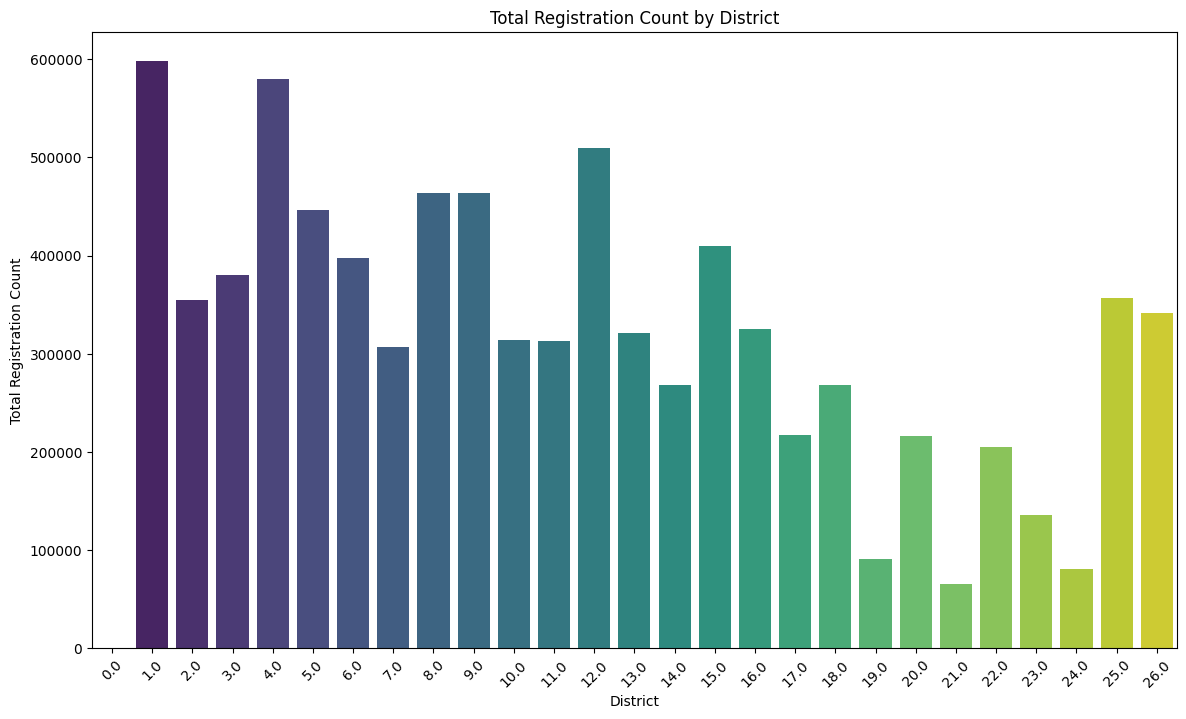

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the DataFrame to include only rows where STATUS is 'Total'
df_total_status = df_voter_enrollment[df_voter_enrollment['STATUS'] == 'Total']

# Sorting the DataFrame by total registration count
df_sorted = df_total_status.sort_values(by='TOTAL', ascending=False)

# Plotting the bar chart without error bars
plt.figure(figsize=(14, 8))
sns.barplot(data=df_sorted, x='DISTRICT', y='TOTAL', palette='viridis', ci=None)
plt.title("Total Registration Count by District")
plt.xlabel("District")
plt.ylabel("Total Registration Count")
plt.xticks(rotation=45)
plt.show()
